In [1]:
import glob
import sys
from os.path import basename

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

sys.path.append("../../")
from helpers.experiment import make_train_test_split, tag_label_feature_split

%matplotlib inline

In [ ]:
dataset_folder = "../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

nrow = round(len(datasets) / 2)
ncol = 2

fig, axs = plt.subplots(nrow, ncol, figsize=(10, nrow * 3))
fig.suptitle(
    "Components to Explain 95% of Dataset Variance\n(Spectrograms to Slightly Less)\n"
)
axs = axs.flatten()

for index, dataset in enumerate(datasets):

    if "spectrogram" in dataset:
        n_components = 2400
    else:
        n_components = 0.95

    pca = PCA(n_components=n_components)

    df = pd.read_pickle(dataset)

    _, (y, _), X = tag_label_feature_split(df, label_format="encoded")
    X_train_std, _, _, _ = make_train_test_split(
        X, y, test_size=0.2, stratify=y, x_scaler="standard"
    )

    original_features = df.shape[1]

    pca.fit(X_train_std)

    axs[index].plot(np.cumsum(pca.explained_variance_ratio_))
    axs[index].set_title(f"{basename(dataset)} ({original_features} features)")
    axs[index].set(
        xlabel=f"number of components ({pca.components_.shape[0]} total)",
        ylabel="cumulative explained variance",
    )
    axs[index].xaxis.set_major_locator(MaxNLocator(integer=True))

if len(datasets) % 2 == 1:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()
fig.savefig("pca.png")

In [ ]:
dataset_folder = "../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

result = []

for dataset in datasets:

    pca = PCA(n_components=3)

    df = pd.read_pickle(dataset)

    _, (y, _), X = tag_label_feature_split(df, label_format="encoded")
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, stratify=y, x_scaler="standard"
    )

    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    result.append(
        [
            basename(dataset),
            pca.explained_variance_ratio_[0],
            sum(pca.explained_variance_ratio_[0:2]),
            sum(pca.explained_variance_ratio_[0:3]),
        ]
    )
df = pd.DataFrame(
    result, columns=["dataset", "1 Component", "2 Components", "3 Components"]
)
df

In [ ]:
dataset_folder = "../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

nrow = len(datasets)

fig, axs = plt.subplots(nrow, figsize=(20, nrow * 10))
axs = axs.flatten()

for index, dataset in enumerate(datasets):

    pca = PCA(n_components=3)

    df = pd.read_pickle(dataset)

    _, (y, le), X = tag_label_feature_split(
        df, samples_per_genre=250, label_format="encoded"
    )
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, stratify=y, x_scaler="standard"
    )

    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    sns.scatterplot(
        x=X_train_pca[:, 0],
        y=X_train_pca[:, 1],
        hue=le.inverse_transform(y_train),
        ax=axs[index],
    ).set(title=basename(dataset))

plt.tight_layout()
plt.show()
fig.savefig("pca_2d_scatter.png")

In [ ]:
dataset_folder = "../../datasets/"
datasets = sorted([name for name in glob.glob(dataset_folder + "dataset_*.pickle")])

sns.set(style="darkgrid")
nrow = len(datasets)

fig = plt.figure(figsize=(20, nrow * 10))
axs = [fig.add_subplot(nrow, 1, row + 1, projection="3d") for row in range(nrow)]

for index, dataset in enumerate(datasets):

    pca = PCA(n_components=3)

    df = pd.read_pickle(dataset)

    _, (y, le), X = tag_label_feature_split(
        df, samples_per_genre=250, label_format="encoded"
    )
    X_train_std, X_test_std, y_train, y_test = make_train_test_split(
        X, y, test_size=0.2, stratify=y, x_scaler="standard"
    )

    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    x = X_train_pca[:, 0]
    y = X_train_pca[:, 1]
    z = X_train_pca[:, 2]

    scatter = axs[index].scatter(x, y, z, c=y_train, cmap=cmap)
    axs[index].set_xlabel("pca 1")
    axs[index].set_ylabel("pca 2")
    axs[index].set_zlabel("pca 3")
    axs[index].set_title(basename(dataset))

plt.tight_layout()
plt.show()
fig.savefig("pca_3d_scatter.png")

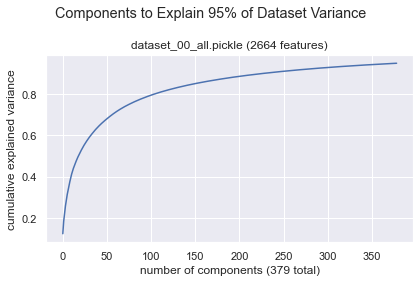

In [2]:
dataset = "../../datasets/dataset_00_all.pickle"
sns.set(style="darkgrid")
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# fig, ax = plt.subplots(figsize=(5,5))
fig, ax = plt.subplots()
fig.suptitle("Components to Explain 95% of Dataset Variance")

df = pd.read_pickle(dataset)

_, (y, le), X = tag_label_feature_split(df, label_format="encoded")
X_train_std, _, _, _ = make_train_test_split(
    X, y, test_size=0.2, stratify=y, x_scaler="standard"
)

original_features = df.shape[1]

pca = PCA(n_components=0.95)
pca.fit(X_train_std)

ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_title(f"{basename(dataset)} ({original_features} features)")
ax.set(
    xlabel=f"number of components ({pca.components_.shape[0]} total)",
    ylabel="cumulative explained variance",
)

plt.tight_layout()
plt.show()
fig.savefig("pca-slide-1.png")

In [3]:
dataset = "../../datasets/dataset_00_all.pickle"

df = pd.read_pickle(dataset)

_, (y, le), X = tag_label_feature_split(
    df, samples_per_genre=250, label_format="encoded"
)
X_train_std, X_test_std, y_train, y_test = make_train_test_split(
    X, y, test_size=0.2, stratify=y, x_scaler="standard"
)

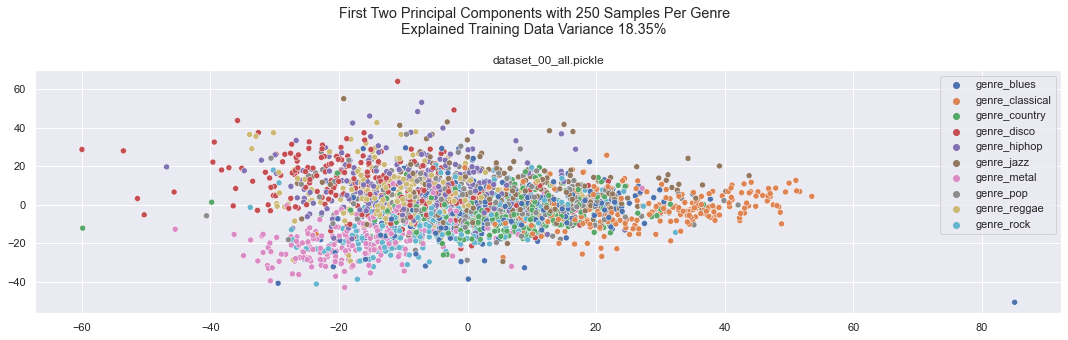

In [4]:
sns.set(style="darkgrid")
pca = PCA(n_components=2)

# Fit PCA with training features only

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Concatenate test and train data for visualization only

X_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

explanation_ratio = round(sum(pca.explained_variance_ratio_[0:2]) * 100, 2)

fig, ax_2d = plt.subplots(figsize=(15, 4.8))
fig.suptitle(
    f"First Two Principal Components with 250 Samples Per Genre\nExplained Training Data Variance {explanation_ratio}%"
)

hue_order = list(le.inverse_transform(range(10)))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=le.inverse_transform(y_merged),
    hue_order=hue_order,
    ax=ax_2d,
    cmap=cmap
).set(title=basename(dataset))


plt.tight_layout()
plt.show()
fig.savefig("pca-slide-2.png")

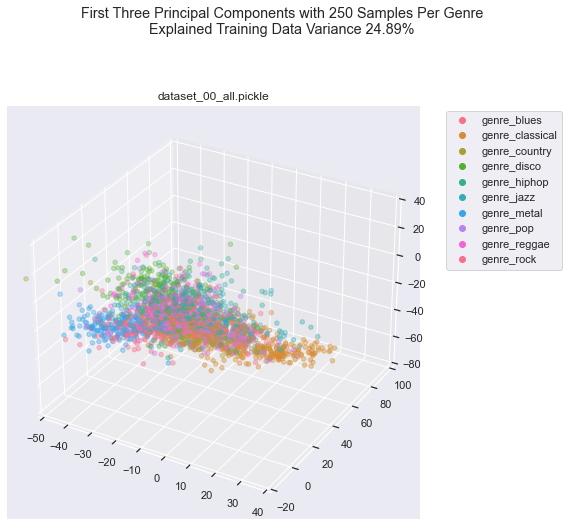

In [5]:
sns.set(style="darkgrid")
pca = PCA(n_components=3)

# Fit PCA with training features only

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Concatenate test and train data for visualization only

X_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)
y_merged = np.concatenate((y_train, y_test), axis=0)

explanation_ratio = round(sum(pca.explained_variance_ratio_[0:3]) * 100, 2)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

fig.suptitle(
    f"First Three Principal Components with 250 Samples Per Genre\nExplained Training Data Variance {explanation_ratio}%"
)


pca_1 = X_pca[:, 0]
pca_2 = X_pca[:, 1]
pca_3 = X_pca[:, 2]


scatter = ax.scatter(pca_1, pca_2, pca_3, c=y_merged, cmap=cmap)
plt.legend(
    scatter.legend_elements()[0],
    list(le.inverse_transform(range(10))),
    bbox_to_anchor=(1.05, 1),
    loc=2,
)

ax.set_title(basename(dataset))
ax.set_xlim(-50, 40)
ax.set_ylim(-20, 100)
ax.set_zlim(-80, 40)
plt.tight_layout()
plt.show()
fig.savefig("pca-slide-3.png")